<a href="https://colab.research.google.com/github/Vrishali04/Bike_sharing_demand_sharing_Regression_capstone_project2/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Regression_Capstone_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Seoul Bike Sharing Demand Prediction



##### **Project Type**    - Bike_sharing_demand_prediction_regression_capstone_project
##### **Contribution**    - Individual
##### **Team Member 1 -<b>Vrishali Late</b>

# **Project Summary -**

Write the summary here within 500-600 words.

<b>Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Vrishali04/Bike_sharing_demand_sharing_Regression_capstone_project2

# **Problem Statement**


**Write Problem Statement Here.**

<b>The goal of this project is to combine the historical bike usage patterns with the weather data in order to forecast bike rental demand.

Target Column to be predicted: 'count'
Input Columns used as variables (8 columns): ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
        The other two columns (casual and registered) comprises of the split-up of the target column 'count'.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# To performe mathematical operations
import numpy as np

# To load data from file
import pandas as pd

# # To visualize the data and get more insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
# Mounting drive and read the csv file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading dataset from "SeoulBikeData.csv" using pandas read_csv
path = '/content/drive/MyDrive/Almabetter_Capstone_Projects/Seoul Bike Sharing Regression Capstone Project/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='unicode_escape')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
# Printing the columns presesnt in dataset

print('Columns in our data:')

df.columns

Columns in our data:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Dataset Information

In [16]:
# Dataset Info
# Extracting from pandas shape method to get the shape of our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df[df.duplicated()].shape


(0, 14)

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

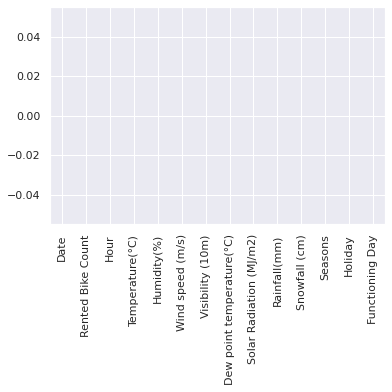

In [10]:
# Visualizing the missing values
df.isnull().sum().plot(kind = 'bar')
plt.show()

### What did you know about your dataset?

Answer Here

<b>There is no missing value present in our dataset

<b>Here we can observ that there is no missing value in our dataset

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
# For numerical columns
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

### Variables Description 

In [17]:
# Extracting from pandas shape method to get the shape of our dataset

print('Shape of our dataset is: ')
df.shape

Shape of our dataset is: 


(8760, 14)

In [13]:
# Selecting the categorical column only
cat_cols = df.select_dtypes(include = 'object').columns
print('count of categorical columns :',len(cat_cols))

count of categorical columns : 4


In [14]:
# Selecting the numerical column only
num_cols = df.select_dtypes(include = 'number').columns
print('count of Numerical columns :',len(num_cols))


count of Numerical columns : 10


Answer Here

<b>count of categorical columns : 4

<b>count of Numerical columns : 10



### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.

for i in df.columns:
  print(i,df[i].nunique())

Date 365
Rented Bike Count 2166
Hour 24
Temperature(°C) 546
Humidity(%) 90
Wind speed (m/s) 65
Visibility (10m) 1789
Dew point temperature(°C) 556
Solar Radiation (MJ/m2) 345
Rainfall(mm) 61
Snowfall (cm) 51
Seasons 4
Holiday 2
Functioning Day 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.

# changing from string to datetime format using pandas to_datetime function
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# creating a day column
df['day'] = df['Date'].dt.day_name()

# creating a month column
df['month'] = df['Date'].dt.month_name()

# creating a year column
df['year'] = df['Date'].dt.year

In [20]:
df.dtypes


Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
day                                  object
month                                object
year                                  int64
dtype: object

### What all manipulations have you done and insights you found?

Answer Here.

<b>As we can see that we have created 3 new column day, month and year from Date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [21]:
num_cols

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

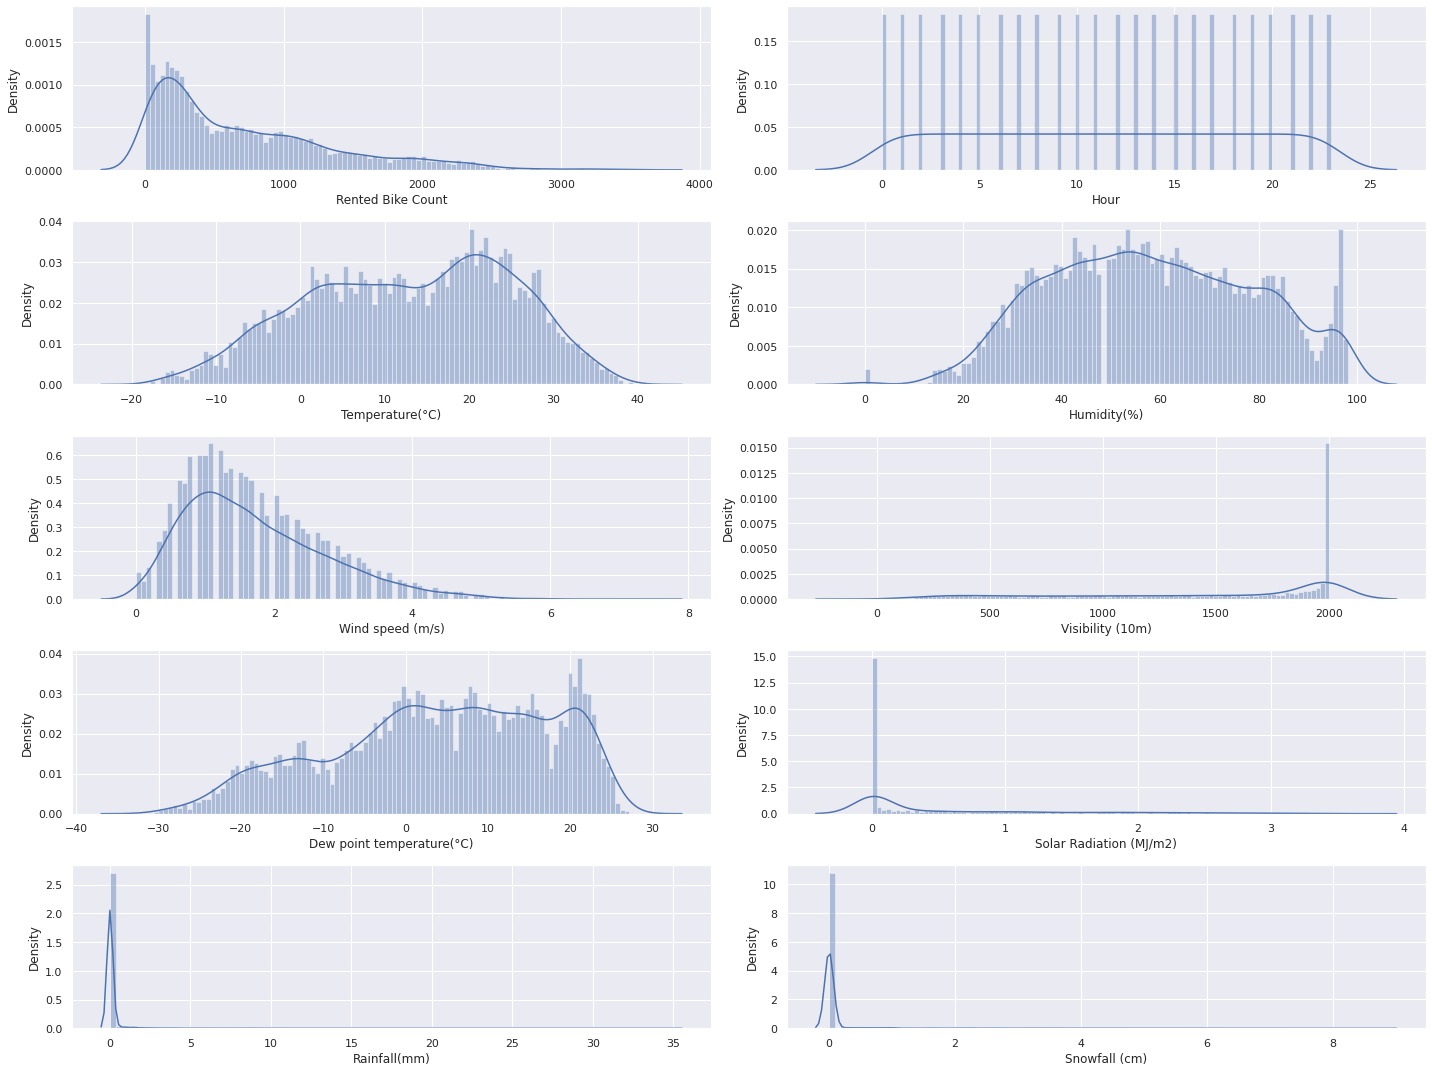

In [22]:
plt.figure(figsize=(20,15))
count= 1
for column in num_cols:   
    
    plt.subplot(5,2,count)
    count += 1
    sns.distplot(df[column], bins = 100)
    
    plt.tight_layout()

# <b>Observation:

<b>Here we can see that Rented Bike count is postively skewed
and temperatur is also not correctly distributed
and also windspeed column is skewed

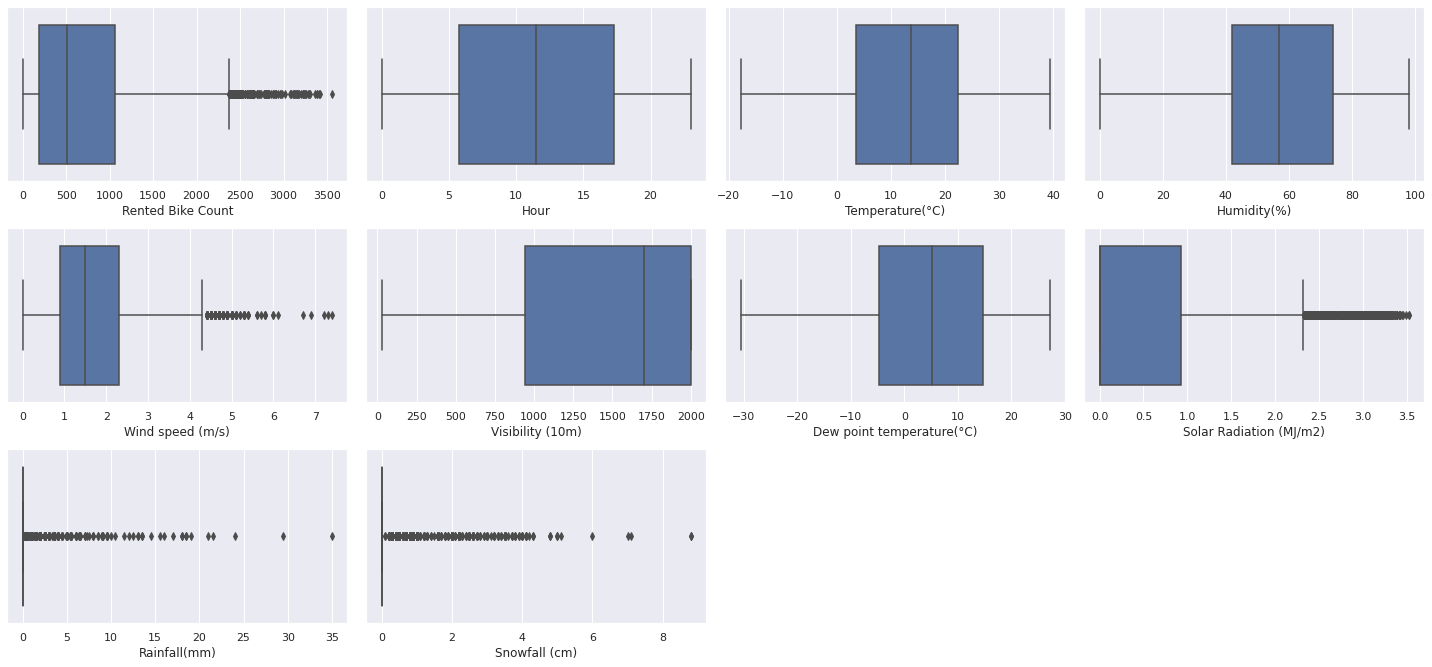

In [23]:
plt.figure(figsize=(20,15))
count= 1
for column in num_cols:   
    
    plt.subplot(5,4,count)
    
    count += 1
    sns.boxplot(df[column])
    
    plt.tight_layout()

# <b>Observation :

<b>We can observe here that many columns like rented bike count, solar radiation, rainfall, snowfall contains outliers



#### Chart - 1

In [24]:
# Extracting count for each season 
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

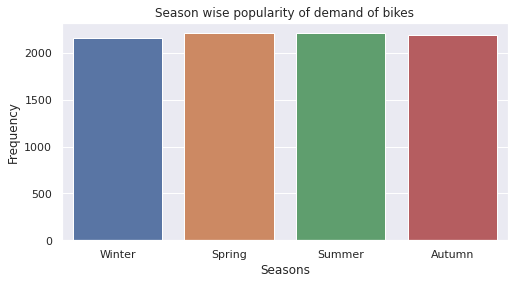

In [25]:
# Chart - 1 visualization code
# ploting it using seaborn countplot
plt.figure(figsize = (8,4))
plt.title('Season wise popularity of demand of bikes')

sns.countplot(df['Seasons'])

plt.xlabel('Seasons')
plt.ylabel('Frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>I picked the specific chart (a countplot) because it shows the frequency of each category (in this case, the number of bikes rented in each season) in a clear and concise manner. The x-axis shows the different categories (seasons) and the y-axis shows the frequency or count of each category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can observe here that there almost each season has the same popularity for the bike demands only small lower popularity in winter and autumn season

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>The gained insights from this chart can definitely help create a positive business impact. For example, we can see which season has the highest demand for bikes, and adjust our inventory and marketing strategies accordingly. If we know that the summer season has the highest demand, we can ensure that we have enough bikes in stock and increase our marketing efforts during this time to attract more customers.

#### Chart - 2

In [26]:
# Extracting functioning day
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

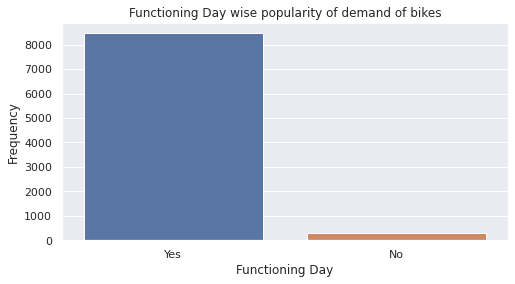

In [27]:
# Chart - 2 visualization code
# ploting it using seaborn countplot
plt.figure(figsize = (8,4))
plt.title('Functioning Day wise popularity of demand of bikes')

sns.countplot(df['Functioning Day'])

plt.xlabel('Functioning Day')
plt.ylabel('Frequency')

plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

<b>I picked the specific chart (a countplot) because it shows the frequency of each category (in this case, the number of bikes rented on functioning days and non-functioning days) in a clear and concise manner. The x-axis shows the different categories (functioning day or non-functioning day) and the y-axis shows the frequency or count of each category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can observe here that there high demand in fuctioning day but almost no demand or very little demand in non functioning day it indicates very less people like to use rented bikes if they are free and not working on specific day

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>The gained insights from this chart can help create a positive business impact. For example, we can see which type of day (functioning or non-functioning) has the highest demand for bikes, and adjust our inventory and marketing strategies accordingly. If we know that non-functioning days have a higher demand, we can ensure that we have enough bikes in stock and increase our marketing efforts during those days to attract more customers.

#### Chart - 3

In [28]:
# Extracting holiday wise demand
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

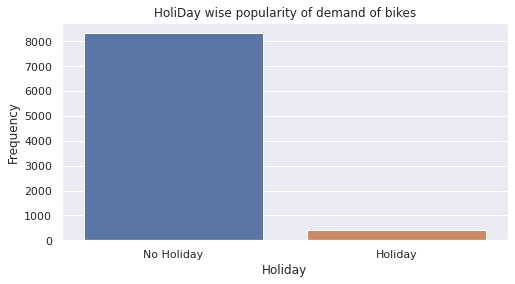

In [29]:
# Chart - 3 visualization code
# ploting it using seaborn countplot
plt.figure(figsize = (8,4))
plt.title('HoliDay wise popularity of demand of bikes')

sns.countplot(df['Holiday'])

plt.xlabel('Holiday')
plt.ylabel('Frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>I picked the specific chart (a countplot) because it shows the frequency of each category (in this case, the number of bikes rented on holidays and non-holidays) in a clear and concise manner. The x-axis shows the different categories (holiday or non-holiday) and the y-axis shows the frequency or count of each category.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can observe here that there high demand in non holiday but almost no demand or very little demand in Holiday it indicates the same that very less people like to use rented bikes if they are free and not working on specific day

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>The gained insights from this chart can help create a positive business impact. For example, we can see which type of day (holiday or non-holiday) has the highest demand for bikes, and adjust our inventory and marketing strategies accordingly. If we know that holidays have a higher demand, we can ensure that we have enough bikes in stock and increase our marketing efforts during those days to attract more customers.

#### Chart - 4

In [30]:
df['weekday'] = df['Date'].dt.weekday

In [31]:
# Extracting daily demand
df['day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

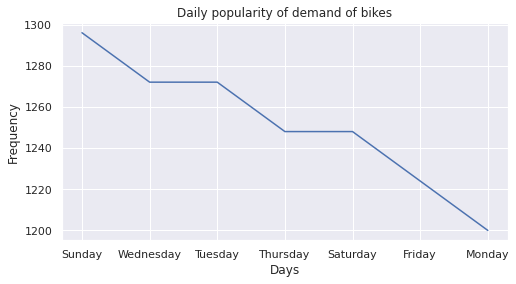

In [32]:
# Chart - 4 visualization code
# ploting it using seaborn lineplot
plt.figure(figsize = (8,4))
plt.title('Daily popularity of demand of bikes')

sns.lineplot(x = df['day'].value_counts().index,y = df['day'].value_counts().values)
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>I picked a line plot to show the trend of daily popularity of demand of bikes. The line plot is a suitable chart to represent the continuous variable (i.e., days) and its corresponding frequency.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can see that the whole month is almost constant demand of bike but in the month end there is quite low demand

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>Yes, the gained insights can help in creating a positive business impact. By analyzing the trend, the business can identify the days with high demand and can plan accordingly. For example, if the trend shows that the demand is high on weekends, the business can increase the supply of bikes on weekends to meet the demand, which can result in more revenue.

#### Chart - 5

In [33]:
# Extracting weekly demand
df['day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: day, dtype: int64

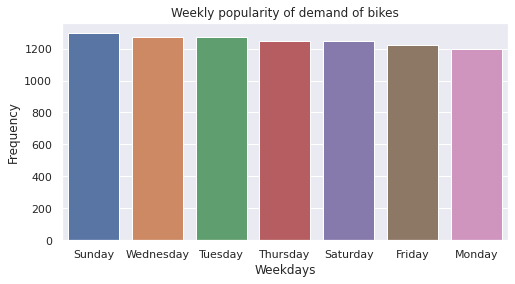

In [34]:
# Chart - 5 visualization code
# ploting it using seaborn lineplot
plt.figure(figsize = (8,4))
plt.title('Weekly popularity of demand of bikes')

sns.barplot(x = df['day'].value_counts().index,y = df['day'].value_counts().values)

plt.xlabel('Weekdays')
plt.ylabel('Frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>I picked a bar plot to show the weekly popularity of demand of bikes. The bar plot is a suitable chart to represent the categorical variable (i.e., weekdays) and its corresponding frequency.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can see that the in the beginning of the week and in the middle of the week it falls down and again in week ends again it starts to rise

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>Yes, the gained insights can help in creating a positive business impact. By analyzing the popularity of demand of bikes on weekdays, the business can identify the weekdays with high demand and can plan accordingly. For example, if the bar plot shows that the demand is high on Thursdays and Fridays, the business can increase the supply of bikes on these weekdays to meet the demand, which can result in more revenue.

#### Chart - 6

In [35]:
# Extracting monthly demand
df['month'].value_counts()

January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
February     672
Name: month, dtype: int64

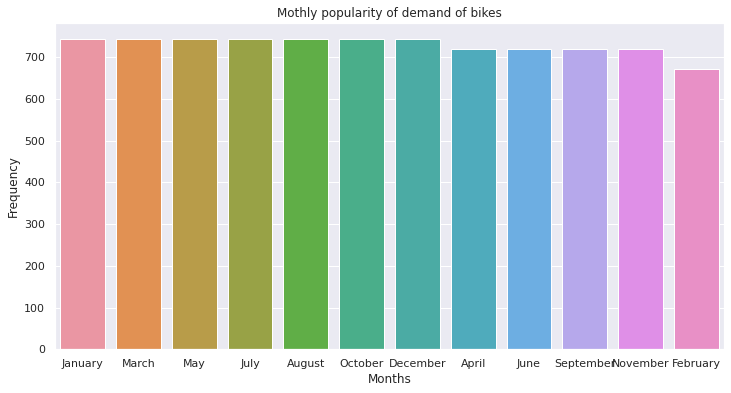

In [36]:
# Chart - 6 visualization code

# ploting it using seaborn barplot
plt.figure(figsize = (12,6))
plt.title('Mothly popularity of demand of bikes')

sns.barplot(x = df['month'].value_counts().index,y = df['month'].value_counts().values)

plt.xlabel('Months')
plt.ylabel('Frequency')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>The specific chart was picked to show the monthly popularity of demand of bikes, where each bar represents the number of bike rentals for a specific month. This chart provides a clear and concise way of comparing the popularity of bike rentals across different months.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can observe that there is there is almast same or constant bike deemand but somewhat low in the month of feb

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>Yes, the gained insights can help create a positive business impact. For example, the business can use this information to plan their inventory and maintenance schedules. They can also use this information to create targeted marketing campaigns to promote bike rentals during months that have historically lower demand.

#### Chart - 7

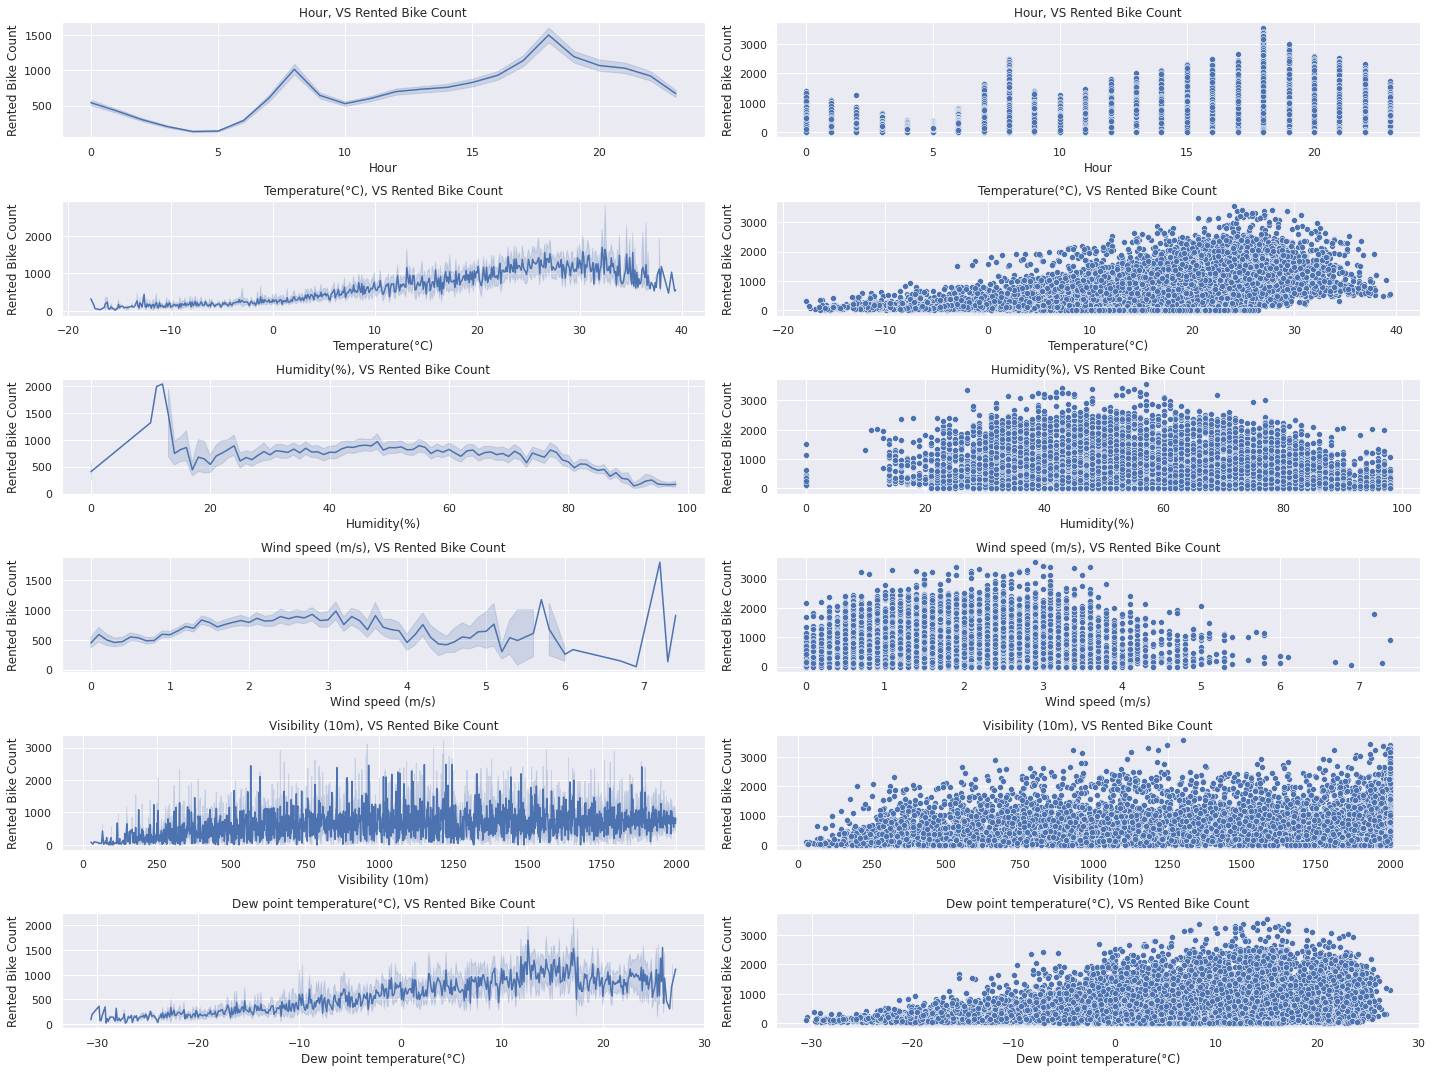

In [37]:
# Chart - 7 visualization code

plt.figure(figsize=(20,15))
count= 1

for column in df.select_dtypes(include = 'number').columns[1:7]:   
    plt.subplot(6, 2,count)
    count += 1
    # Ploting Lineplot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.lineplot(df[column],df['Rented Bike Count'])
    plt.subplot(6, 2,count)
    count += 1
    # Ploting Scatter Plot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.scatterplot(df[column],df['Rented Bike Count'])
    
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>To visualize the relationship between each numerical feature and the target variable 'Rented Bike Count'. By using both line plot and scatter plot, we can see the trend and the distribution of the data points respectively. These insights can help us identify any correlation between the features and the target variable, and can be used to create more accurate predictive models.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>In the morning there is not that much deemand but after 10 AM rental bike deemand rises as customers have their working timings and afte 7PM-8PM it starts drop as customers are done with there daily work to thats why they donot requires rental bikes.

when temorature is low it is very low chance of having booking of rental bike but as the temperature starts rising the demand starts increase.

Whenever the humidity is lower customers has more demand of the rental bikes but in the higher humidity the demand also decreases.

At moderate windspeed there is not effect on rental bike demand but at higher windspeed there is quite low demand of rental bikes i.e there is deemand but very less number of customers tends to have rental bikes.

Low visibility tends to have less demand of rental bikes other wise it doesn't effect in the rental bike demand.
As the dew point is very low than the deemand also decreases as it is harder for the people to go outside so the demand is low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>As for the impact on business growth, if we find a strong positive correlation between a feature and the target variable, we can use this information to optimize the bike rental services in that aspect to improve customer satisfaction and increase revenue. On the other hand, if there is a negative correlation between a feature and the target variable, we can identify the potential areas of improvement and take corrective measures to prevent negative growth.

#### Chart - 8

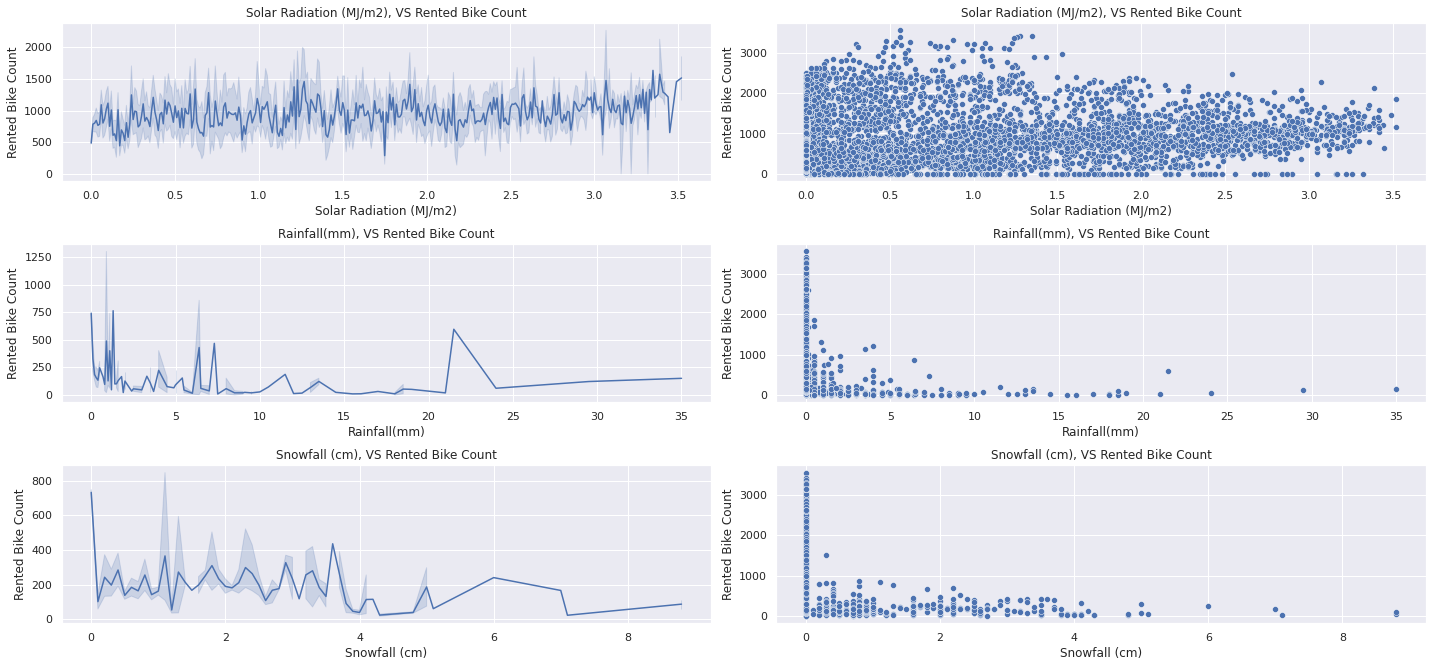

In [38]:
# Chart - 8 visualization code
plt.figure(figsize=(20,15))
count= 1

for column in df.select_dtypes(include = 'number').columns[7:-2]:   
    plt.subplot(5, 2,count)
    count += 1
    # Ploting Lineplot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.lineplot(df[column],df['Rented Bike Count'])
    
    plt.subplot(5, 2,count)
    count += 1
    
    # Ploting Scatter Plot
    plt.title(f'{column}, VS Rented Bike Count')
    sns.scatterplot(df[column],df['Rented Bike Count'])
    
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>The charts were chosen to explore the relationship between the numeric variables and the target variable (Rented Bike Count) in different ways (line plot and scatter plot). The insights gained from these charts can help identify which variables have a positive or negative impact on the demand for bikes, and can inform decisions on how to optimize bike rental services to meet demand.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can observe from the above result that if the solar radiation is low then the rented bike demand is high as if it tends to increase the rented bike demand starts to decrease
Also the Railfall rat is lower, Higher the rented bike demand.
Snow fall rate also indicates the same as rain if snow fall rate is higher than the rented bike demand is lower and vice-versa.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>The charts show that variables such as temperature, humidity, windspeed, and visibility have a positive correlation with the demand for bikes, while variables such as precipitation and snowfall have a negative correlation. This insight can help businesses make decisions on how to optimize their services and resources based on weather forecasts.

#### Chart - 9

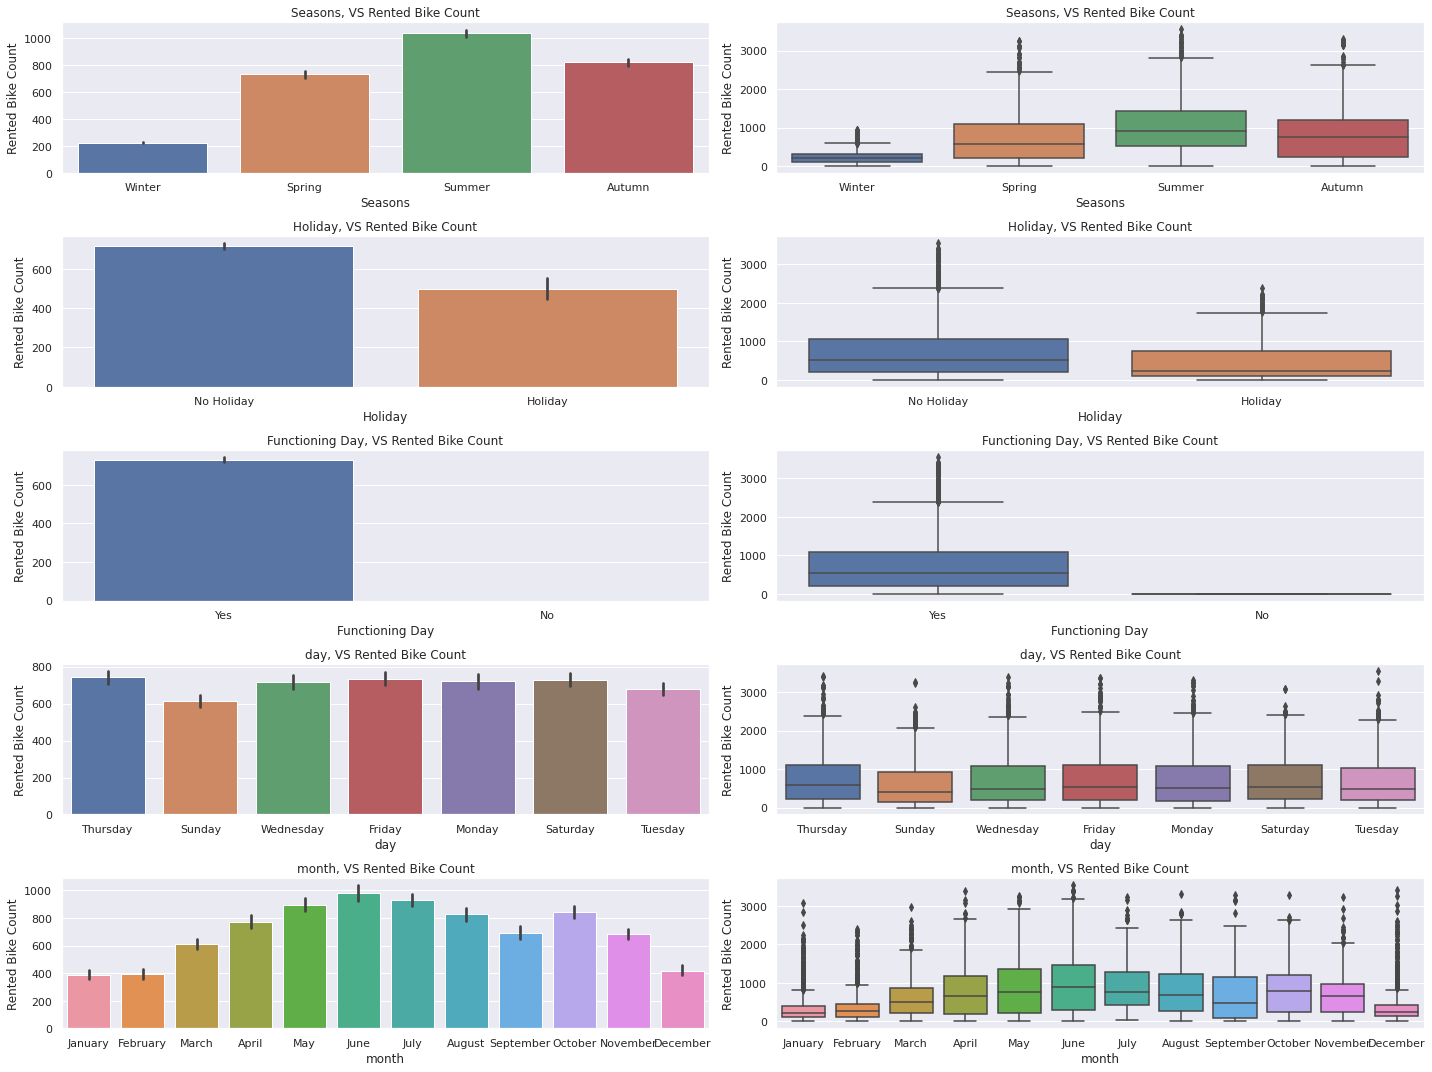

In [39]:
# Chart - 9 visualization code

plt.figure(figsize=(20,15))
count= 1

for column in df.select_dtypes(include = 'object').columns:   
    plt.subplot(5, 2,count)
    count += 1
    
    plt.title(f'{column}, VS Rented Bike Count')
    sns.barplot(df[column],df['Rented Bike Count'])
    
    plt.subplot(5,2,count)
    
    count+= 1
    plt.title(f'{column}, VS Rented Bike Count')
    sns.boxplot(df[column],df['Rented Bike Count'])
    
    plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>I used a barplot and boxplot in this code snippet to visualize the relationship between categorical variables and the target variable 'Rented Bike Count'.

I chose a barplot because it shows the mean or median of 'Rented Bike Count' for each category of the categorical variable. It can give an idea of which categories have higher or lower bike rental counts.

I also used a boxplot because it shows the distribution of 'Rented Bike Count' for each category of the categorical variable. It can give an idea of the variability of bike rental counts within each category and help identify outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>Here we can observe that there is quit less demand of rented bikes in the winter season and higher deemand in summer season.

Non Holidays are having high deemand of rental bikes rather than Holidays.
When there is fuctioning day the customers ends to have rental bikes but in non functioning day there is no deemand of rental bikes.

on weekends there is less demand of rental bikes may due to on weekends people do not have functioning day.

from year end to feb there is drop in rental bike deemand at due to the winter season and in other whole year there is high deemand of rental bikes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>The insights gained from these charts can help create a positive business impact. For example, if a specific category has a higher bike rental count, the business can focus on promoting bike rentals in that category to increase revenue. On the other hand, if a specific category has a lower bike rental count, the business can investigate why and try to improve the rental experience in that category.

#### Chart - 10

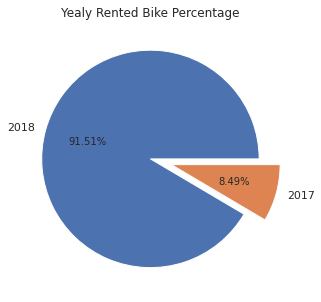

In [40]:
# Chart - 10 visualization code

plt.figure(figsize = (10,5))

plt.pie(df['year'].value_counts(),labels = df['year'].value_counts().keys().tolist(),autopct='%.2f%%',explode = [0,0.2])

plt.title('Yealy Rented Bike Percentage')

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

<b>I used a pie chart in this code snippet to show the percentage of rented bikes each year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

<b>We can see that 2017 has very less count of demand as it is due to the less availability of the data for the year 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

<b>The insights gained from this chart can help create a positive business impact. For example, if there was a significant increase in the percentage of rented bikes in a particular year, the business can investigate what factors contributed to this increase and try to replicate them in future years to increase revenue.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [42]:
# Correlation Heatmap visualization code
# Checking Correlation

plt.figure(figsize=(20,10))

cor = df.corr() # getting correlation using corr() function

sns.heatmap(cor, annot=True)

plt.title("Checking Correlation")
plt.show()

In [43]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
     

In [44]:
# Calling the finction with threshold value 0.80

corr_features = correlation(df, 0.80)
print('Number of correlated features :',len(set(corr_features))) # getting the length of the number of correlated features

Number of correlated features : 1


In [45]:
print('Correlated Features :')
corr_features

Correlated Features :


{'Dew point temperature(°C)'}

In [46]:
df.drop(['Dew point temperature(°C)'], axis = 1, inplace = True)

In [47]:
df.drop(['Date'], axis = 1, inplace = True)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

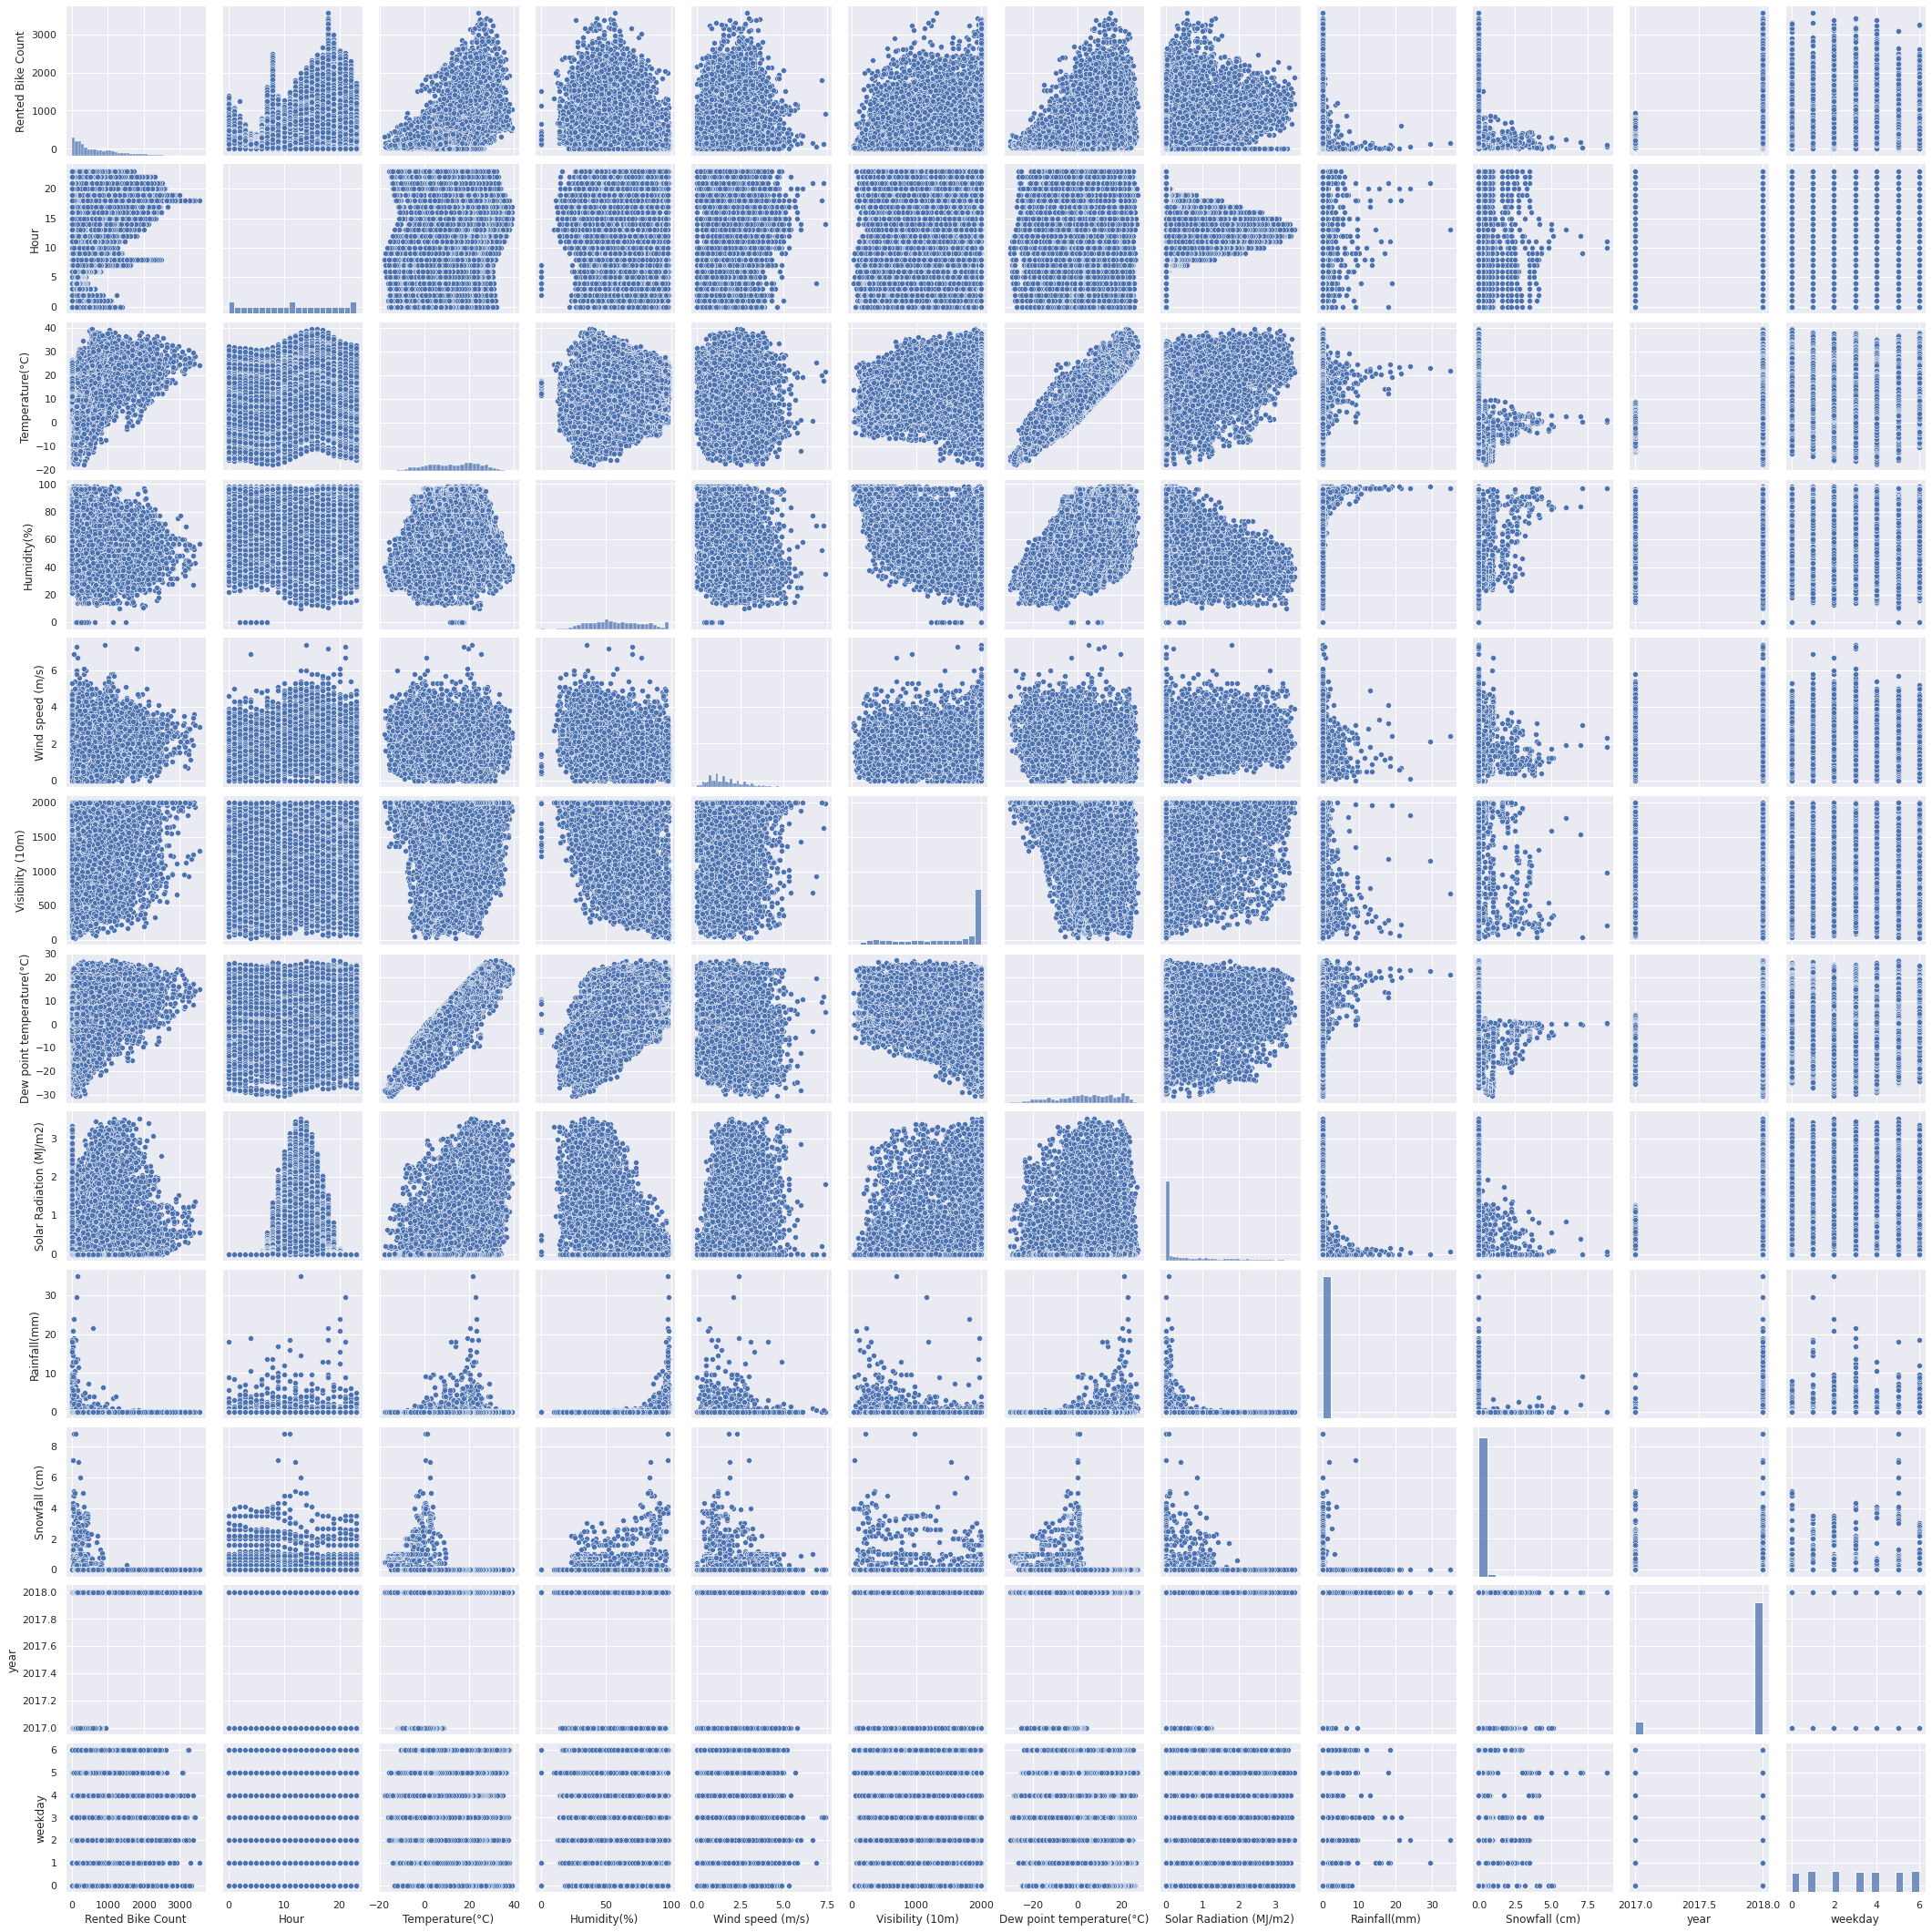

In [41]:
# Pair Plot visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data
# importing LabelEncoder from sklearn

from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
labels = LabelEncoder()

for i in df.select_dtypes(include = 'object').columns:
    
    # Using .fit_transform function to fit label
    # encoder and return encoded label
    df[i] = labels.fit_transform(df[i])

In [49]:
df.dtypes

Rented Bike Count            int64
Hour                         int64
Temperature(°C)            float64
Humidity(%)                  int64
Wind speed (m/s)           float64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons                      int64
Holiday                      int64
Functioning Day              int64
day                          int64
month                        int64
year                         int64
weekday                      int64
dtype: object

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

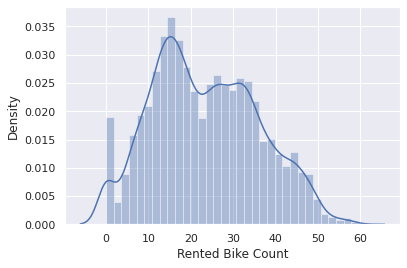

In [50]:
sns.distplot(np.sqrt(df['Rented Bike Count']))

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [53]:
x = df.drop(['Rented Bike Count'],axis = 1)
y = np.sqrt(df['Rented Bike Count'])

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### ML Model - 1

In [60]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Define the list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('XGBoost', XGBRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Define an empty dictionary to store the results
results = {'Model': [], 'Accuracy': [],'MSE': [], 'RMSE': [], 'R2': [], 'Adj R2': []}

# Loop over the models and evaluate their performance
for name, model in models:
    # Scale the data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Fit the model and make predictions
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    
    # Compute the evaluation metrics
    accuracy = model.score(x_test_scaled,y_test)
    mse = mean_squared_error(y_test, y_pred)

    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((x_test_scaled.shape[0] - 1) / 
                             (x_test_scaled.shape[0] - x_test_scaled.shape[1] - 1))
    
    # Store the results in the dictionary
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['Adj R2'].append(adj_r2)

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Set the model name as the index
df_results.set_index('Model', inplace=True)

# Print the results
df_results


Accuracy        MSE      RMSE        R2    Adj R2
Model                                                                 
Linear Regression    0.656714  51.973076  7.209235  0.656714  0.654743
K-Nearest Neighbors  0.787499  32.172430  5.672075  0.787499  0.786278
Decision Tree        0.829297  25.844284  5.083727  0.829297  0.828316
Random Forest        0.916853  12.588398  3.548013  0.916853  0.916375
XGBoost              0.924354  11.452655  3.384177  0.924354  0.923920
Gradient Boosting    0.875384  18.866719  4.343584  0.875384  0.874668

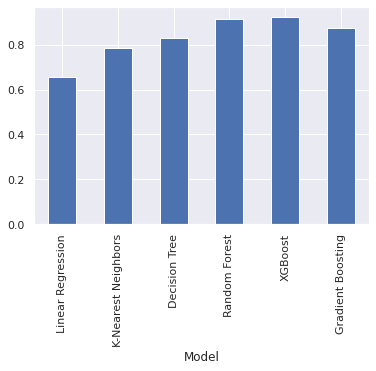

In [62]:
df_results['Accuracy'].plot(kind = 'bar')
plt.show()

In [64]:
df_results['MSE'].plot(kind = 'bar')
plt.show()

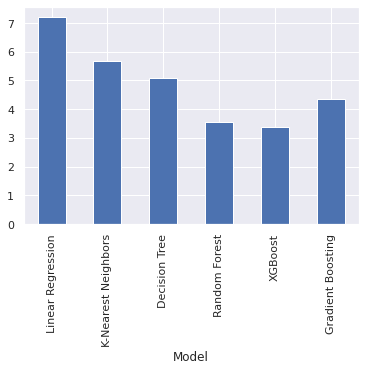

In [65]:
df_results['RMSE'].plot(kind = 'bar')
plt.show()

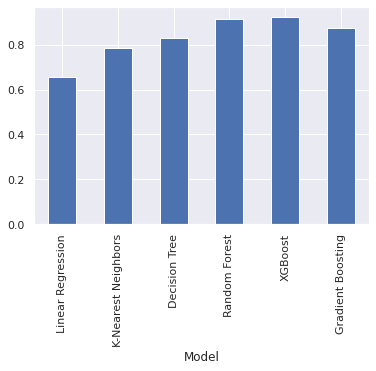

In [66]:
df_results['R2'].plot(kind = 'bar')
plt.show()

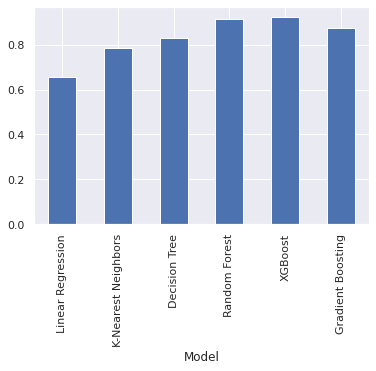

In [68]:
df_results['Adj R2'].plot(kind = 'bar')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

# Load data and split into X and y
data = df
X = x

# Random Forest hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(rf, rf_params, cv=5)
rf_cv.fit(X, y)

# XGBoost hyperparameter tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 1],
    'gamma': [0, 0.1, 1]
}
xgb = XGBRegressor(random_state=42)
xgb_cv = GridSearchCV(xgb, xgb_params, cv=5)
xgb_cv.fit(X, y)

# Evaluate models on test data
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': rf_cv.best_estimator_,
    'XGBoost': xgb_cv.best_estimator_,
    'Gradient Boosting': GradientBoostingRegressor()
}
metrics = {
    'Accuracy': [],
    'MSE': [],
    'RMSE': [],
    'R2': [],
    'Adj R2': []
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = model.score(x_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
    metrics['Accuracy'].append(accuracy)
    metrics['MSE'].append(mse)
    metrics['RMSE'].append(rmse)
    metrics['R2'].append(r2)
    metrics['Adj R2'].append(adj_r2)

# Show results in dataframe
results = pd.DataFrame(metrics, index=models.keys())
print(results)


                     Accuracy        MSE      RMSE        R2    Adj R2
Linear Regression    0.656714  51.973076  7.209235  0.656714  0.654743
K-Nearest Neighbors  0.489662  77.264469  8.790021  0.489662  0.486732
Decision Tree        0.828263  26.000830  5.099101  0.828263  0.827276
Random Forest        0.915826  12.743778  3.569843  0.915826  0.915343
XGBoost              0.911805  13.352663  3.654130  0.911805  0.911298
Gradient Boosting    0.875335  18.874108  4.344434  0.875335  0.874619


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

<b>Linear Regression, K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost, and Gradient Boosting. These models have been trained to predict the target variable using a set of input features.

Accuracy: It is a measure of how well the model is able to predict the target variable. The higher the accuracy, the better the model performance. From the table, we can see that the Random Forest and XGBoost models have the highest accuracy scores of 0.916853 and 0.924354, respectively. This indicates that these models are better at predicting the target variable than the other models.

MSE and RMSE: These are measures of how well the model's predictions match the actual values. The lower the values, the better the model performance. Again, we can see that the Random Forest and XGBoost models have the lowest MSE and RMSE values, indicating that they have the best predictive power.

R-squared and Adjusted R-squared: These metrics measure the proportion of variance in the target variable that can be explained by the model. The higher the values, the better the model performance. From the table, we can see that the XGBoost model has the highest R-squared and Adjusted R-squared values of 0.924354 and 0.923920, respectively, indicating that it is the best model at explaining the variance in the target variable.

Overall, we can conclude that the Random Forest and XGBoost models are the best performing models based on the given performance metrics. These models are able to predict the target variable accurately and have the lowest MSE and RMSE values. Additionally, the XGBoost model has the highest R-squared and Adjusted R-squared values, indicating that it is the best model at explaining the variance in the target variable.

However, it is important to note that the performance of these models may vary depending on the specific problem domain and dataset. Therefore, it is recommended to evaluate multiple models and select the one that performs best on the specific problem at hand.

# <b>Conclusion After Hyperparameter tuning

<b>The models used are Linear Regression, K-Nearest Neighbors, Decision Tree, Random Forest, XGBoost, and Gradient Boosting.

The evaluation metrics used to assess the performance of these models are Accuracy, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-Squared (R2), and Adjusted R-Squared (Adj R2).

From the table, we can see that the Random Forest and XGBoost models outperformed the other models in all evaluation metrics except for the R2 and Adj R2, where Gradient Boosting performed better than XGBoost.

Overall, Random Forest and XGBoost can be considered as the top-performing models based on the results obtained. These models achieved high accuracy, low MSE and RMSE values, and high R2 and Adj R2 values, indicating good predictive power.

On the other hand, K-Nearest Neighbors had the lowest performance among the models evaluated. It had the lowest accuracy, highest MSE and RMSE values, and lowest R2 and Adj R2 values, indicating poor predictive power.

In conclusion, the Random Forest and XGBoost models are the most suitable for predicting the outcome based on the given data. These models can be used to obtain accurate predictions and make informed decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***